
## Sammenligning av lettlest-bøker mot andre ungdomsbøker


In [100]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn

import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

# lager et referansekorpus

refurns = get_urns_from_text('./urnref.txt')

# voksenkorpus

vrefurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':80})
reference = [r[0] for r in vrefurns]

# Lager korpus

Dataene som brukes i sammenligningen kommer fra lister over URNer som ligger i fila `urner_lettlest.txt`, og fra listen over URN-er som ligger i fila `urnref.txt`.

For sammenligning av tekster fra Dewey ligger info om WebDewey [her](http://deweysearchno.pansoft.de/webdeweysearch/executeSearch.html?lastScheduleRecord=&lastTableRecord=&query=808.80384&catalogs=nb.no)

In [102]:
# f er målkorpuset

f = nb.get_corpus_text(urns)
nb.normalize_corpus_dataframe(f)

True

In [103]:
# r blir tekstene fra Dewey 839 

r = nb.get_corpus_text(refurns)
nb.normalize_corpus_dataframe(r)

True

In [104]:
v = nb.get_corpus_text(reference)
nb.normalize_corpus_dataframe(v)

True

## Kode for å beregne forholdet mellom tegn i en tekst

In [105]:
import pandas as pd

def ratio(frame, val1, val2):
    return pd.DataFrame(frame.dropna()[val1]/frame.dropna()[val2]).dropna()

In [115]:
def sammenlign(f, r, value, labels=['f','r'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.hist(f.transpose().dropna()[value], bins=10, density=True, color='blue', alpha=0.6);
    plt.hist(r.transpose().dropna()[value], bins=10, density=True, color='orange', alpha = 0.6);
    plt.legend(labels)
    plt.tight_layout()
    return

def plottlitt(f, r, labels=['lettlest','referanse'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    lett = plt.hist(f, bins=10, density=True, color='blue', alpha=0.6, label ='lett');
    ref = plt.hist(r, bins=10, density=True, color='orange', alpha = 0.6, label ='referanse');
    plt.legend(labels)
    plt.tight_layout()
    return
    

## Punktum og komma som kompleksitetsmarkører

Mange punktum (relativt) er koblet til setningslengde. Lange setninger gir også flere komma.


Her sjekker vi forholdet mellom antall punktum og komma - hvert dokument er knyttet til forholdstallet: $doc \leftarrow\frac{punktum}{komma}$. Jo mer punktum og færre komma, jo større blir verdien. Her forventes det at lettlest-tekster har større verdi enn referansen.

I histogrammet gir tallet på x-aksen forholdstallet, og y-aksen gir antallet dokument. Histogrammene er relativisert for å kunne gjøre sammenligning, siden referansekorpuset er større enn målkorpuset.


Ratioen forsterker effekten av at tekstene i lettlestkategorien
har flere punktum og færre komma (relativt sett) enn i referansekategorien

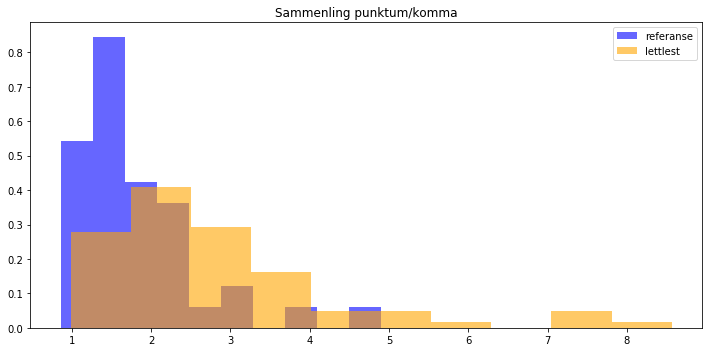

In [107]:
plottlitt(ratio(r.transpose(),'.',',')[0], ratio(f.transpose(),'.',',')[0], labels=['referanse','lettlest'], title="Sammenling punktum/komma")

#### Sammenligning av komma i de to kategoriene. Lettlest har færre komma.

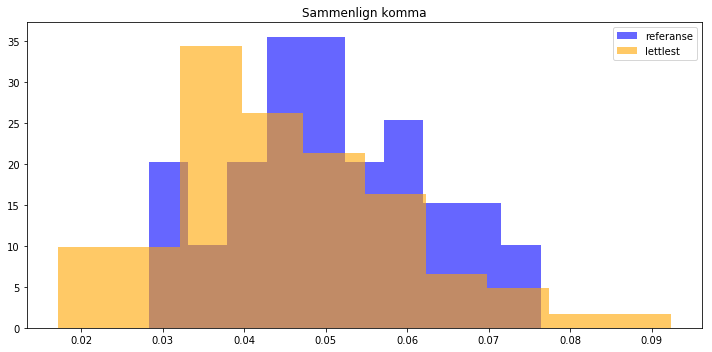

In [108]:
plottlitt(r.transpose().dropna()[','], f.transpose()[','], labels=['referanse','lettlest'], title="Sammenlign komma")

#### Lettlest har flere punktum.

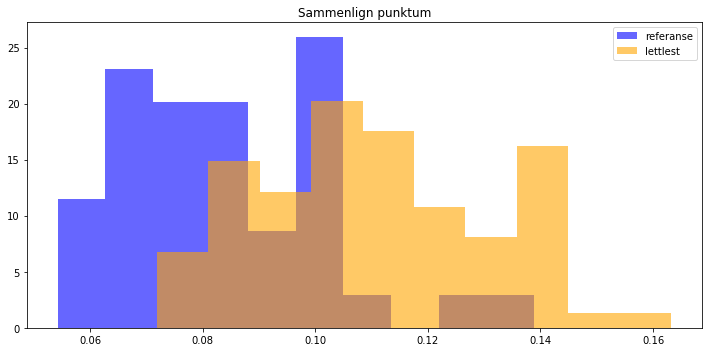

In [109]:
plottlitt(r.transpose().dropna()['.'], f.transpose()['.'], labels=['referanse','lettlest'], title="Sammenlign punktum")

# Sammenligning av andre ord

Forskjellige ord kan knyttes til forskjellige sjangre.

#### Argumenterende ord er ikke-eksisterende?

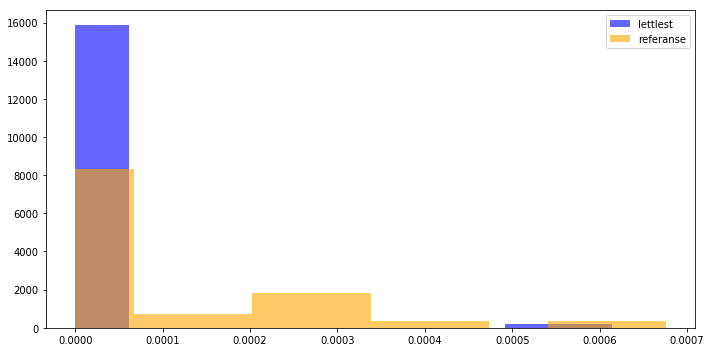

In [110]:
sammenlign(f, r, 'derfor',labels=['lettlest','referanse'])

Her kan vi også se på statistikken:

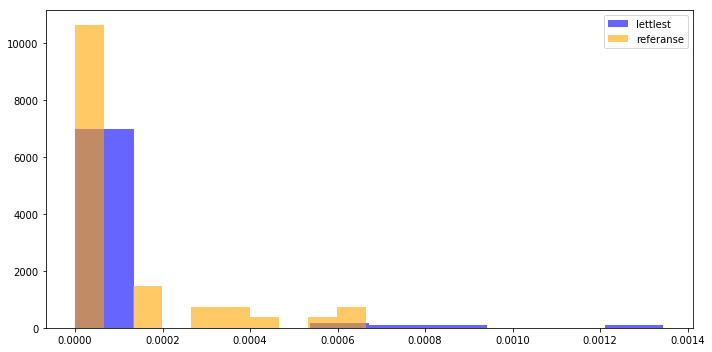

In [111]:
sammenlign(f, r, 'Derfor',labels=['lettlest','referanse'])

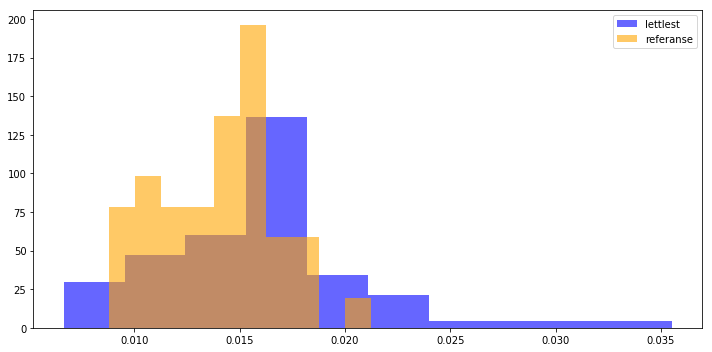

In [112]:
sammenlign(f, r, 'ikke', labels=['lettlest','referanse'])

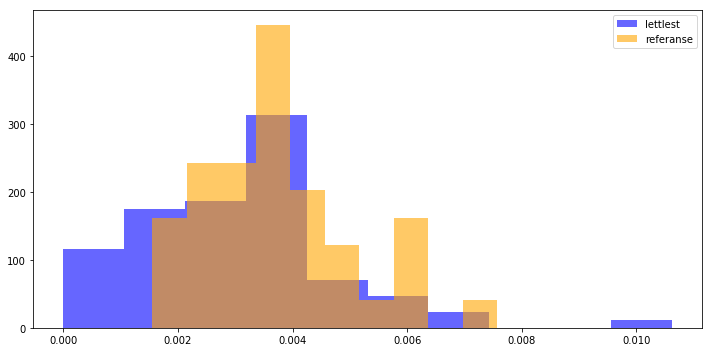

In [113]:
sammenlign(f, r, 'men', labels=['lettlest', 'referanse'])

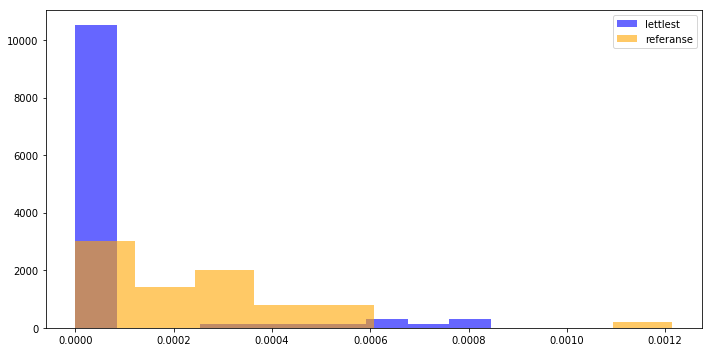

In [114]:
sammenlign(f, r, 'hvem', labels=['lettlest','referanse'])

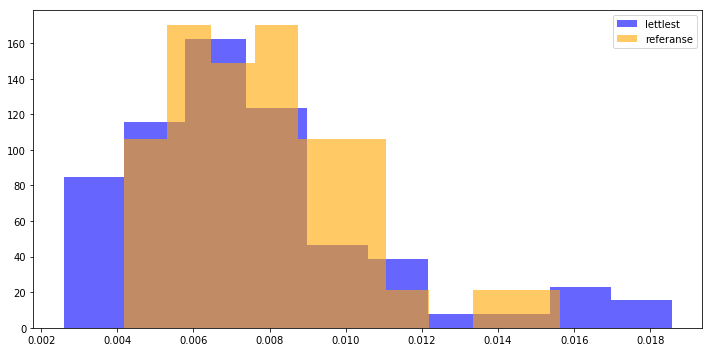

In [38]:
sammenlign(f, r, 'den', labels=['lettlest','referanse'], title="Ordet 'den'")

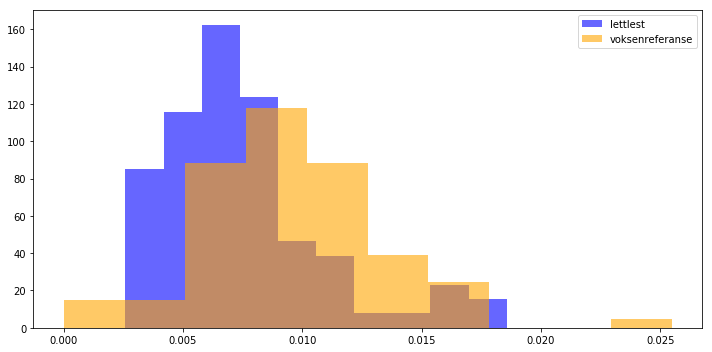

In [37]:
sammenlign(f, v, 'den', labels=['lettlest','voksenreferanse'])